Name of the student : SHIVAM RAVI

Project Title: Automate extraction of handwritten text from an image

Name of the Organization: TCS

Name of the Industry Mentor: Debashis Roy

Name of the Institute: Nitte Mahalinga Adyanthaya Memorial Institute of Technology

Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [3]:
data = pd.read_csv(r"C:\Users\SHIVAM RAVI\Desktop\3rd Year\Untitled Folder\A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

Splitting the data read into the images & their corresponding labels. The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read & use it in the y to form the labels.

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

Reshaping the data in the csv file so that it can be displayed as an image

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In the above segment, we are splitting the data into training & testing dataset using train_test_split().
Also, we are reshaping the train & test image data so that they can be displayed as an image, as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


All the labels are present in the form of floating point values, that we convert to integer values, & so we create a dictionary word_dict to map the integer values with the characters.

# Plotting the number of alphabets in the dataset

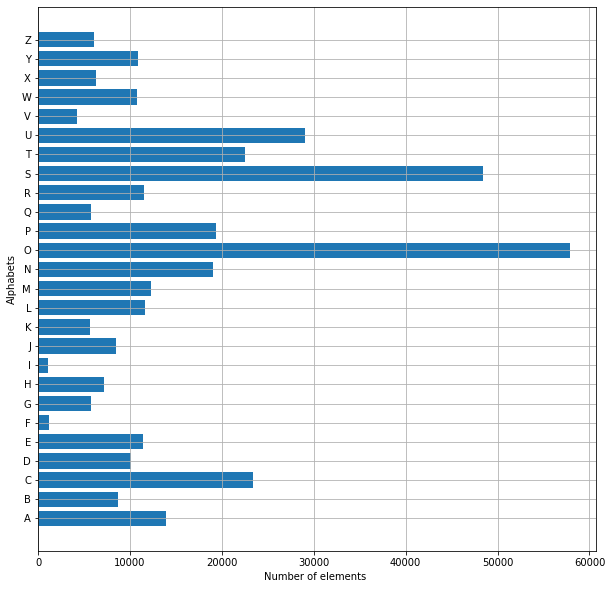

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

Here we are only describing the distribution of the alphabets.
Firstly we convert the labels into integer values and append into the count list according to the label. This count list has the number of images present in the dataset belonging to each alphabet.
Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
Now using the count & alphabets lists we draw the horizontal bar plot.

Now we shuffle some of the images of the train set.
The shuffling is done using the shuffle() function so that we can display some random images.
We then create 9 plots in 3×3 shape & display the thresholded images of 9 alphabets.

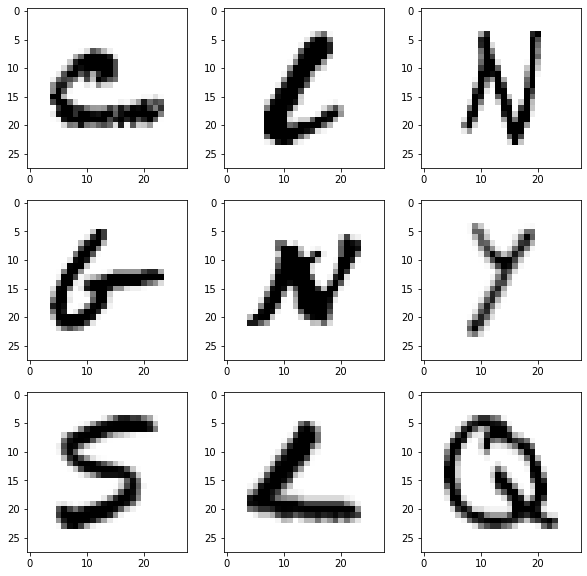

In [7]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

Now we reshape the train & test image dataset so that they can be put in the model.

New shape of train data: (297960, 28, 28, 1)

New shape of train data: (74490, 28, 28, 1)

In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)




New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


Here we convert the single float values to categorical values. This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


Now we define the CNN.

What is CNN?
CNN stands for Convolutional Neural Networks that are used to extract the features of the images using several layers of filters.

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

The convolution layers are generally followed by maxpool layers that are used to reduce the number of features extracted and ultimately the output of the maxpool and layers and convolution layers are flattened into a vector of single dimension and are given as an input to the Dense layer (The fully connected network).

Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
The dataset is very large so we are training for only a single epoch, however, as required we can even train it for multiple epochs (which is recommended for character recognition for better accuracy).

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 380s 41ms/step - loss: 0.1533 - accuracy: 0.9585 - val_loss: 0.1106 - val_accuracy: 0.9696


Now we are getting the model summary that tells us what were the different layers defined in the model & also we save the model using model.save() function.

In [13]:
model.summary() 
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

Getting the Train & Validation Accuracies & Losses
In the above code segment, we print out the training & validation accuracies along with the training & validation losses for character recognition.

In [14]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9696201086044312]
The training accuracy is : [0.958511233329773]
The validation loss is : [0.11058701574802399]
The training loss is : [0.15326851606369019]


Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, that are made using the model.predict() function for text recognition.

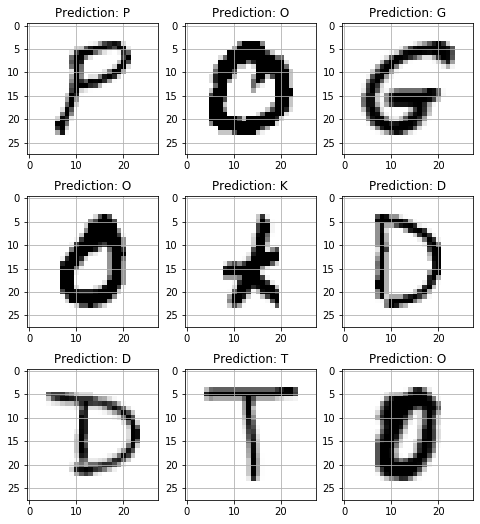

In [15]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

Here we have read an external image that is originally an image of alphabet ‘B’ and made a copy of it that is to go through some processing to be fed to the model for the prediction that we will see in a while.
The img read is then converted from BGR representation (as OpenCV reads the image in BGR format) to RGB for displaying the image, & is resized to our required dimensions that we want to display the image in.

In [16]:
img = cv2.imread(r'C:\Users\SHIVAM RAVI\Desktop\3rd Year\Untitled Folder\b2.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


Now we do some processing on the copied image (img_copy).
We convert the image from BGR to grayscale and apply thresholding to it. We don’t need to apply a threshold we could use the grayscale to predict, but we do it to keep the image smooth without any sort of hazy gray colors in the image that could lead to wrong predictions.
The image is to be then resized using cv2.resize() function into the dimensions that the model takes as input, along with reshaping the image using np.reshape() so that it can be used as model input.

In [17]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

Now we make a prediction using the processed image & use the np.argmax() function to get the index of the class with the highest predicted probability. Using this we get to know the exact character through the word_dict dictionary.
This predicted character is then displayed on the frame.

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

Here we are setting up a waitKey in a while loop that will be stuck in loop until Esc is pressed, & when it gets out of loop using cv2.destroyAllWindows() we destroy any active windows created to stop displaying the frame.

In [ ]:

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()